In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
from datetime import datetime

#### Lets read in the data from the CSVs and make the adustments as we did in the notebooks exploration notebooks

In [2]:
#boston data
boston_cal_df = pd.read_csv('data/boston-airbnb-open-data/calendar.csv',parse_dates=True)
boston_listings_df = pd.read_csv('data/boston-airbnb-open-data/listings.csv',parse_dates=True)
boston_reviews_df = pd.read_csv('data/boston-airbnb-open-data/reviews.csv')


#Convert the date column to a date time type
boston_cal_df['new_date'] = pd.to_datetime(boston_cal_df['date'],format = '%Y-%m-%d').dt.date

boston_cal_df = boston_cal_df.drop('date', axis = 1)

#Remove $ from strings

boston_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')
boston_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\,',value=r'')

#convert price column to a float type
boston_cal_df['new_price'] = pd.to_numeric(boston_cal_df['price'])

boston_cal_df = boston_cal_df.drop('price', axis = 1)


In [3]:
#Seattle Data

seattle_cal_df = pd.read_csv('data/seattle/calendar.csv',parse_dates=True)
seattle_listings_df = pd.read_csv('data/seattle/listings.csv',parse_dates=True)
seattle_reviews_df = pd.read_csv('data/seattle/reviews.csv')

#Convert the date column to a date time type
seattle_cal_df['new_date'] = pd.to_datetime(seattle_cal_df['date'],format = '%Y-%m-%d').dt.date

seattle_cal_df = seattle_cal_df.drop('date', axis = 1)

#Remove $ from strings

seattle_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')
seattle_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\,',value=r'')

#convert price column to a float type
seattle_cal_df['new_price'] = pd.to_numeric(seattle_cal_df['price'])

seattle_cal_df = seattle_cal_df.drop('price', axis = 1)

# How do prices compare over time for the two cities?

In [4]:
date_price_Boston_df = boston_cal_df[[
    'new_date',
    'new_price']].groupby([
    'new_date']).mean().reset_index(level=['new_date'])

date_price_Boston_df['days'] = (date_price_Boston_df['new_date'] - min(date_price_Boston_df['new_date'])).dt.days

In [5]:
date_price_Seattle_df = seattle_cal_df[[
    'new_date',
    'new_price']].groupby([
    'new_date']).mean().reset_index(level=['new_date'])

date_price_Seattle_df['days'] = (date_price_Seattle_df['new_date'] - min(date_price_Seattle_df['new_date'])).dt.days

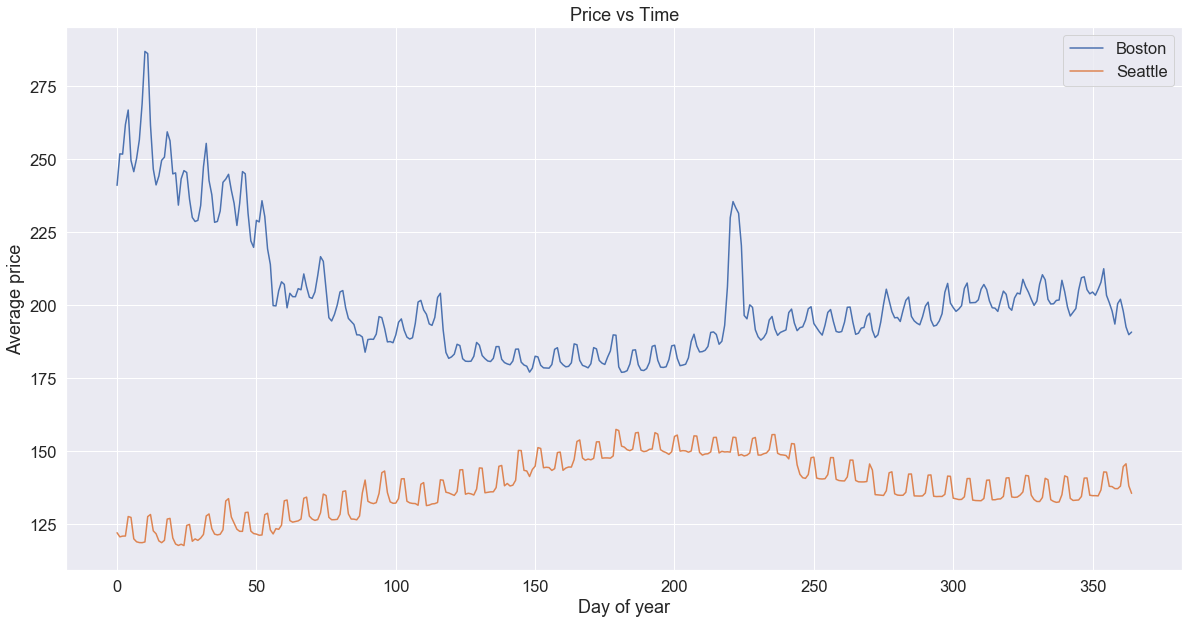

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

sns.lineplot(x='days', y='new_price', data=date_price_Boston_df)
sns.lineplot(x='days', y='new_price', data=date_price_Seattle_df)
ax.set(xlabel='Day of year', ylabel='Average price')
#ax.set_fontsize(20)
plt.title('Price vs Time')
plt.legend(labels=['Boston','Seattle'])
#ax.set(xlim = (, ))
plt.show();

In [7]:
fig.savefig('price_time.png')

# what are the mothly average prices for each city?

In [8]:

date_price_Boston_df['month'] = pd.to_datetime(date_price_Boston_df['new_date']).dt.strftime('%m')


date_price_Seattle_df['month'] = pd.to_datetime(date_price_Seattle_df['new_date']).dt.strftime('%m')

monthly_boston = round(date_price_Boston_df.groupby(date_price_Boston_df['month'])['new_price'].mean(),2).to_frame().reset_index(level=['month'])
monthly_boston = monthly_boston.rename(columns={"new_price": "new_price_boston"})
monthly_boston['new_price_boston_sub_mean'] = round(monthly_boston['new_price_boston'] - np.mean(monthly_boston['new_price_boston']),2)
monthly_boston = monthly_boston.drop('new_price_boston',axis = 1)

monthly_seattle = round(date_price_Seattle_df.groupby(date_price_Seattle_df['month'])['new_price'].mean(),2).to_frame().reset_index(level=['month'])
monthly_seattle = monthly_seattle.rename(columns={"new_price": "new_price_seattle"}).drop('month', axis=1)
monthly_seattle['new_price_seattle_sub_mean'] = round(monthly_seattle['new_price_seattle'] - np.mean(monthly_seattle['new_price_seattle']),2)
monthly_seattle = monthly_seattle.drop('new_price_seattle', axis = 1)

In [9]:
prices = pd.concat([monthly_boston, monthly_seattle], axis=1)
prices

,month,new_price_boston_sub_mean,new_price_seattle_sub_mean
0,01,-18.30,-15.11
1,02,-20.15,-13.50
2,03,-19.38,-9.18
3,04,-3.33,-2.70
4,05,-7.38,1.72
5,06,-4.56,9.66
6,07,1.38,14.28
7,08,2.23,12.84
8,09,42.72,5.47
9,10,33.23,-0.78


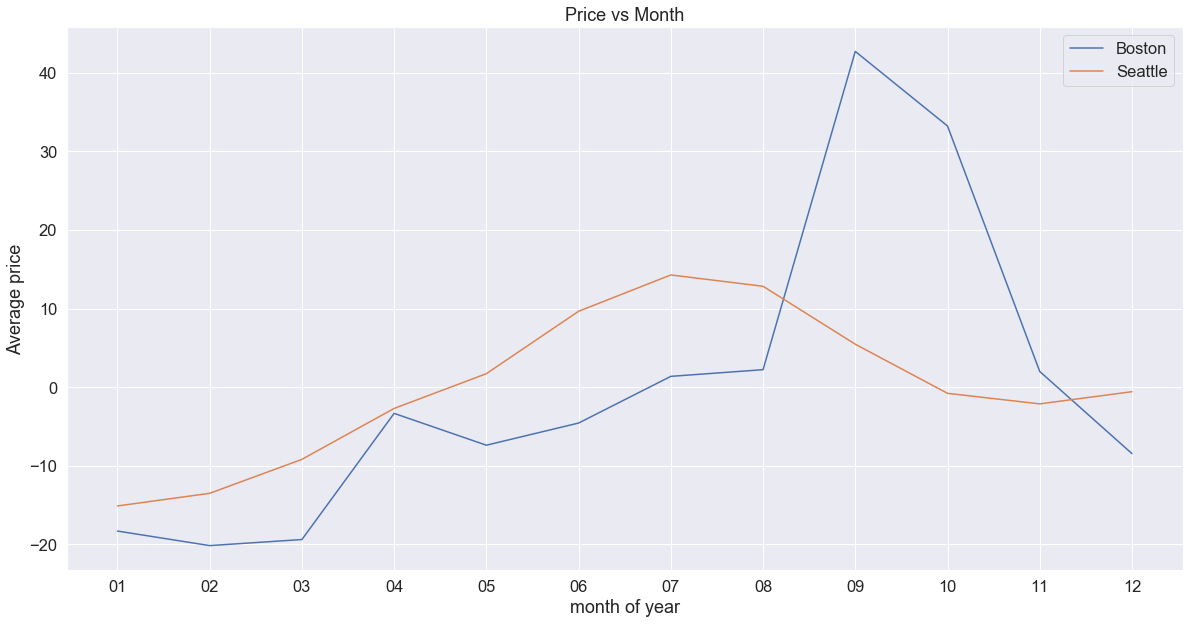

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

sns.lineplot(x='month', y='new_price_boston_sub_mean', data=prices)
sns.lineplot(x='month', y='new_price_seattle_sub_mean', data=prices)
ax.set(xlabel='month of year', ylabel='Average price')




plt.title('Price vs Month')
plt.legend(labels=['Boston','Seattle'])

plt.show();

In [11]:
fig.savefig('price_MEAN.png')